In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

In [45]:
cols = ["arch", "activation", "attack", "iterations", "eps 2", "eps 4", "eps 6", "eps 8", "eps 10", "SROCC"]
data = pd.read_csv("rs/results.csv", header=0, usecols=cols)

In [6]:
data.sample(5, random_state=0)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
2,resnet50-Linearity,silu,IFGSM,1,0.259757,0.238187,0.190764,0.139551,0.088635,0.897968
30,resnet18-Linearity,relu,IFGSM,3,0.917008,1.026367,0.982350,0.851601,0.737798,0.895401
55,resnet50-Linearity,relu_gelu,IFGSM,1,0.337678,0.316484,0.270371,0.221533,0.172357,0.899888
16,debiasedresnet50-Linearity,relu,IFGSM,1,0.115847,0.104205,0.089759,0.076662,0.064832,0.900750
13,resnet50-Linearity,elu,IFGSM,1,0.223308,0.201556,0.169279,0.135976,0.101153,0.908697


In [7]:
fsilu_data = data[(data["arch"]=="resnet50-Linearity")&(data["activation"]=="Fsilu")].loc[:,"eps 2": "eps 10"].values
print(fsilu_data[0][0],fsilu_data[-1])

0.163610402542497 [0.97357313 1.26601247 1.30603955 1.22152177 1.11837141]


In [8]:
group1 = [("resnet18-Linearity", "relu"), ("resnet34-Linearity", "relu"), ("resnet50-Linearity", "relu"), ("wideresnet50-Linearity", "relu")]
group2 = [("resnet50-Linearity", "relu"), ("resnet50-Linearity", "silu"), ("resnet50-Linearity", "relu_silu"),("resnet50-Linearity", "Frelu_silu"),("resnet50-Linearity", "relu_elu"),("resnet50-Linearity", "Frelu_elu"),("resnet50-Linearity", "relu_gelu"),("resnet50-Linearity", "Fsilu"),("resnet50-Linearity", "elu"),("resnet50-Linearity", "gelu"),("resnet50-Linearity", "Fgelu"),("resnet50-Linearity", "Felu") ]
group3 = [("resnet50-Linearity", "relu"),("advresnet50-Linearity","relu"),("wideresnet50-Linearity", "relu"),("vonenet50-Linearity", "relu"),("resnet50-Linearity+prune=0.1pls", "relu"),("resnet50-Linearity+prune=0.1l1", "relu"),("resnet50-Linearity+prune=0.1l2", "relu"), ("resnet50-Linearity+prune=0.1pls", "Felu")]
group4 = [("textureresnet50-Linearity","relu"), ("shaperesnet50-Linearity","relu"), ("debiasedresnet50-Linearity","relu")]
group5 = [("debiasedresnet50-Linearity+prune=0.1pls", "relu"), ("debiasedresnet50-Linearity+prune=0.1pls", "elu"), ("debiasedresnet50-Linearity", "elu"), ("resnet50-Linearity+prune=0.1pls", "Felu"), ("resnet50-Linearity+prune=0.1pls", "silu"), ("resnet50-Linearity", "relu")]

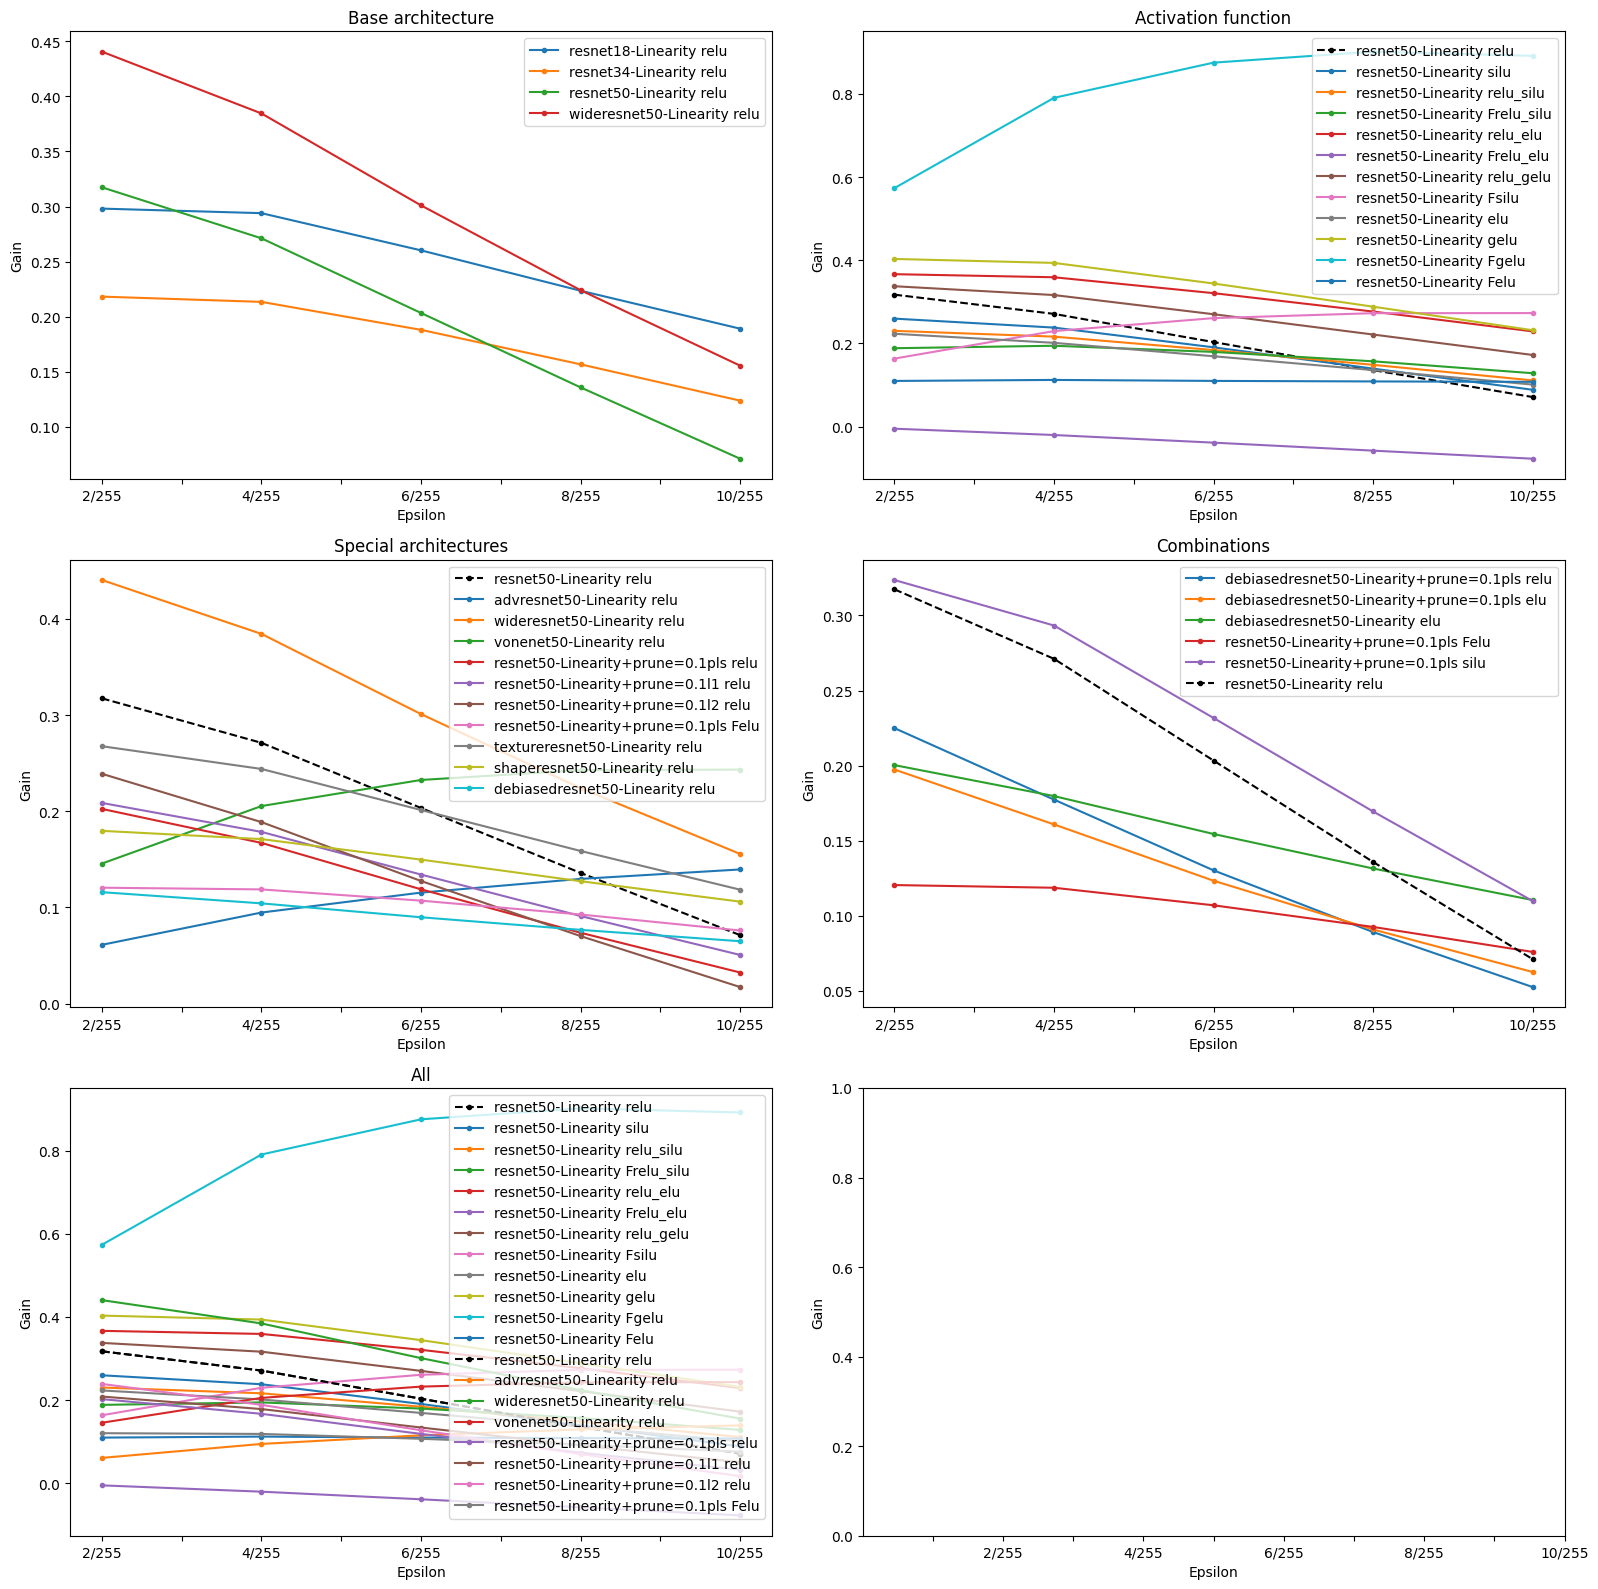

In [19]:
group = group2 + group3
groups = [group1, group2, group3+group4, group5, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']
iters = 1.0

fig, axs = plt.subplots(3,2, figsize=(16,16), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("Combinations")
axs[2,0].set_title("All")
fig.tight_layout()
axs  = axs.flatten()
# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(5):
    axis = axs[i]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
# fig.savefig('graph4.png')


In [47]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4+group5)
iters = 1.0
df_ifgsm1_all_eps = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_ifgsm1_all_eps.loc[len(df_ifgsm1_all_eps)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(srocc),
                       'result': float(abs(np.trapezoid(y_axis, x)))}
df_ifgsm1_all_eps.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.852854,0.314930
debiasedresnet50-Linearity,relu,0.900750,0.721931
resnet50-Linearity+prune=0.1pls,Felu,0.842097,0.833254
resnet50-Linearity,Felu,0.836820,0.879594
advresnet50-Linearity,relu,0.854453,0.879987
resnet50-Linearity+prune=0.1pls,relu,0.905343,0.953854
debiasedresnet50-Linearity+prune=0.1pls,elu,0.905012,1.010472
resnet50-Linearity+prune=0.1l2,relu,0.907126,1.028814
resnet50-Linearity+prune=0.1l1,relu,0.906935,1.066691
debiasedresnet50-Linearity+prune=0.1pls,relu,0.902619,1.071500


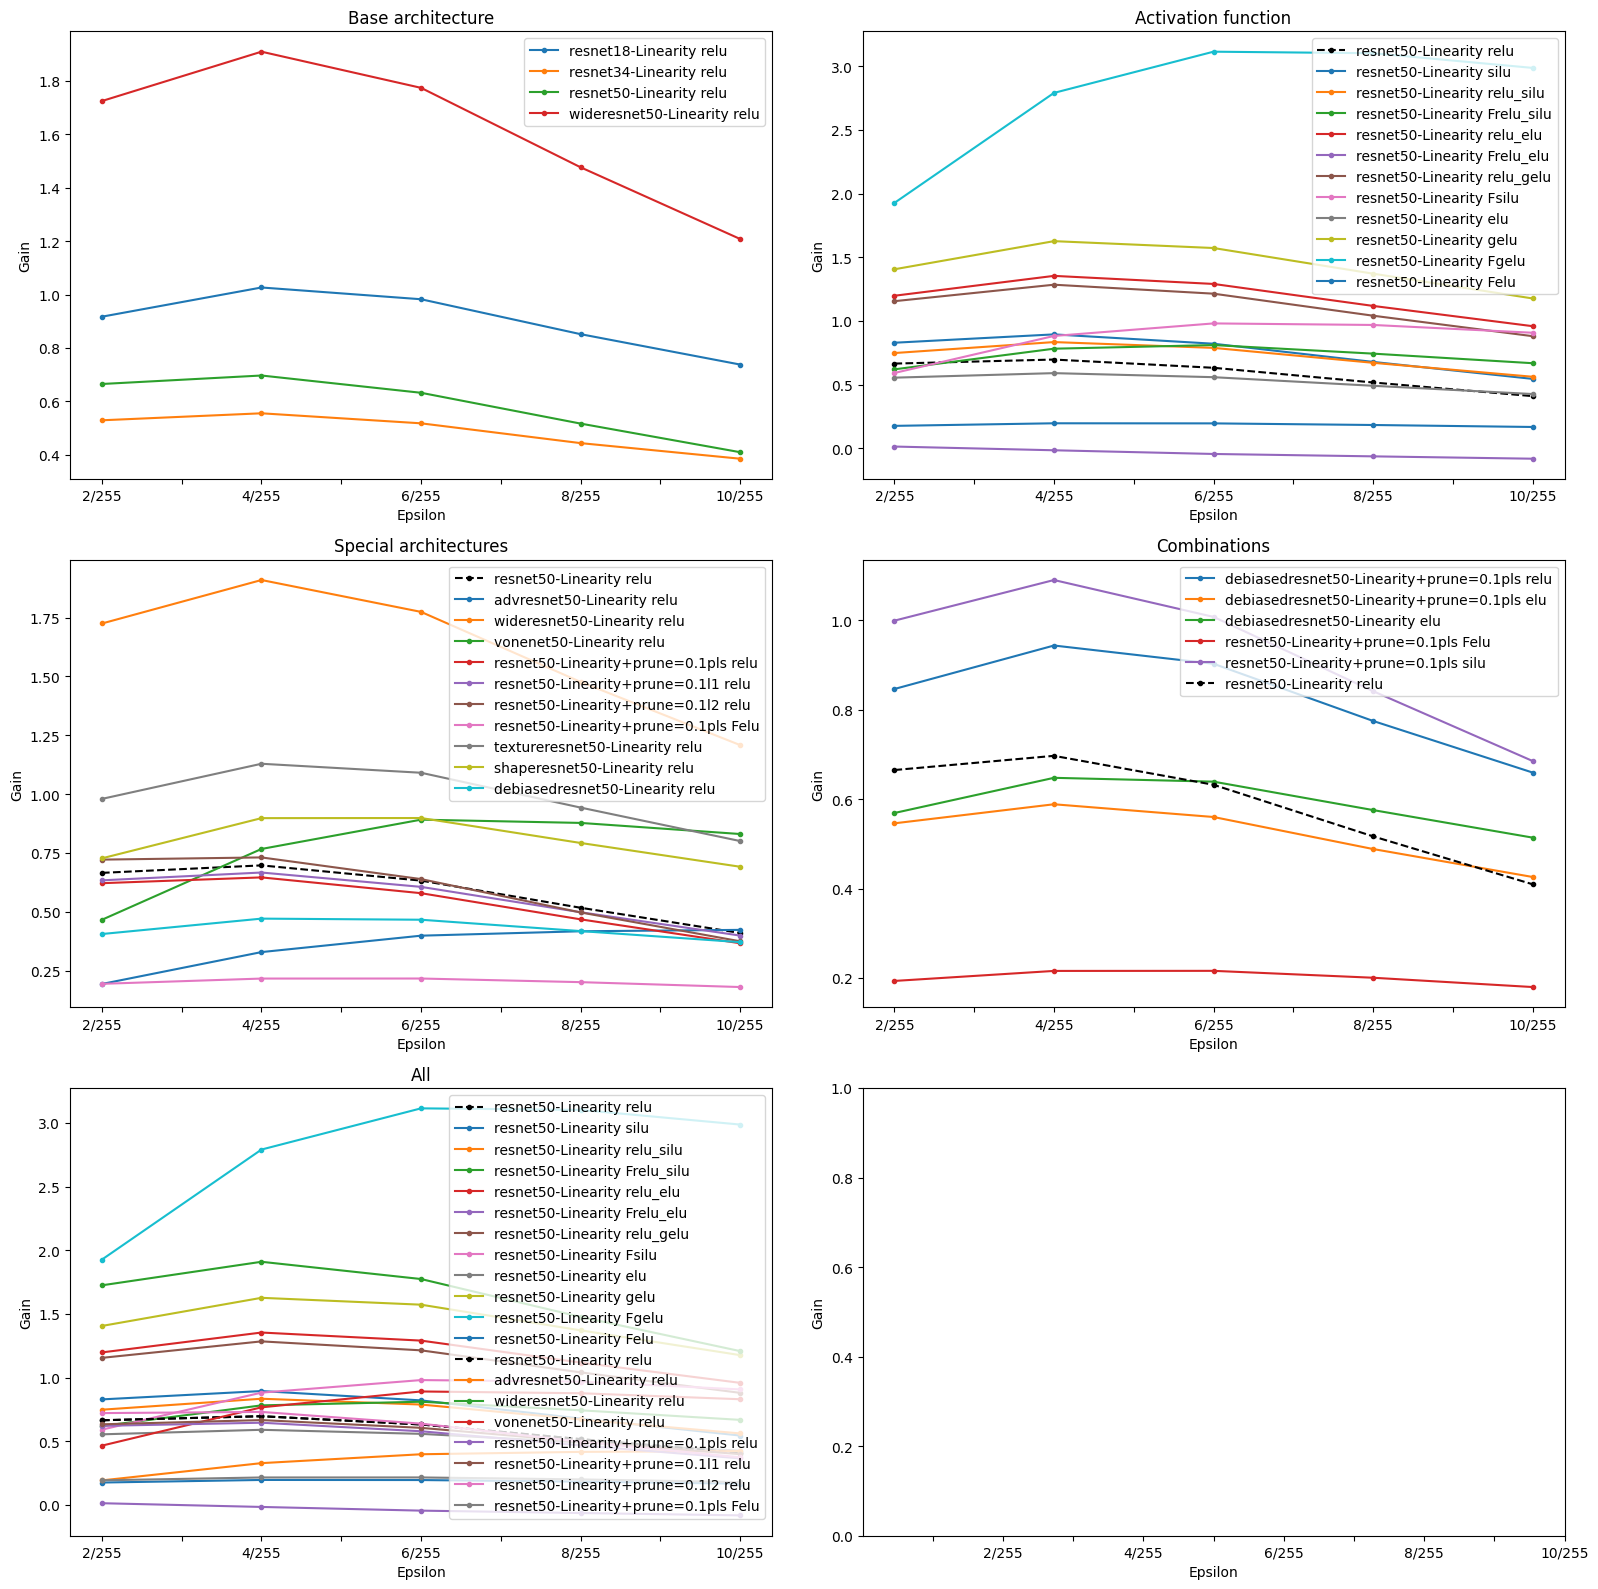

In [21]:
group = group2 + group3
groups = [group1, group2, group3+group4, group5, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']
iters = 3.0

fig, axs = plt.subplots(3,2, figsize=(16,16), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("Combinations")
axs[2,0].set_title("All")
fig.tight_layout()
axs  = axs.flatten()
# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(5):
    axis = axs[i]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
# fig.savefig('graph4.png')


In [24]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4+group5)
iters = 3.0
df_ifgsm3_all_eps = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_ifgsm3_all_eps.loc[len(df_ifgsm3_all_eps)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(srocc),
                       'result': float((np.trapezoid(y_axis, x)))}
df_ifgsm3_all_eps.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.852854,-0.315960
resnet50-Linearity,Felu,0.836820,1.492364
resnet50-Linearity+prune=0.1pls,Felu,0.842097,1.637753
advresnet50-Linearity,relu,0.854453,2.901547
debiasedresnet50-Linearity,relu,0.900750,3.483180
resnet34-Linearity,relu,0.901809,3.946982
debiasedresnet50-Linearity+prune=0.1pls,elu,0.905012,4.245225
resnet50-Linearity,elu,0.908697,4.258631
resnet50-Linearity+prune=0.1pls,relu,0.905343,4.370357
resnet50-Linearity+prune=0.1l1,relu,0.906935,4.570719


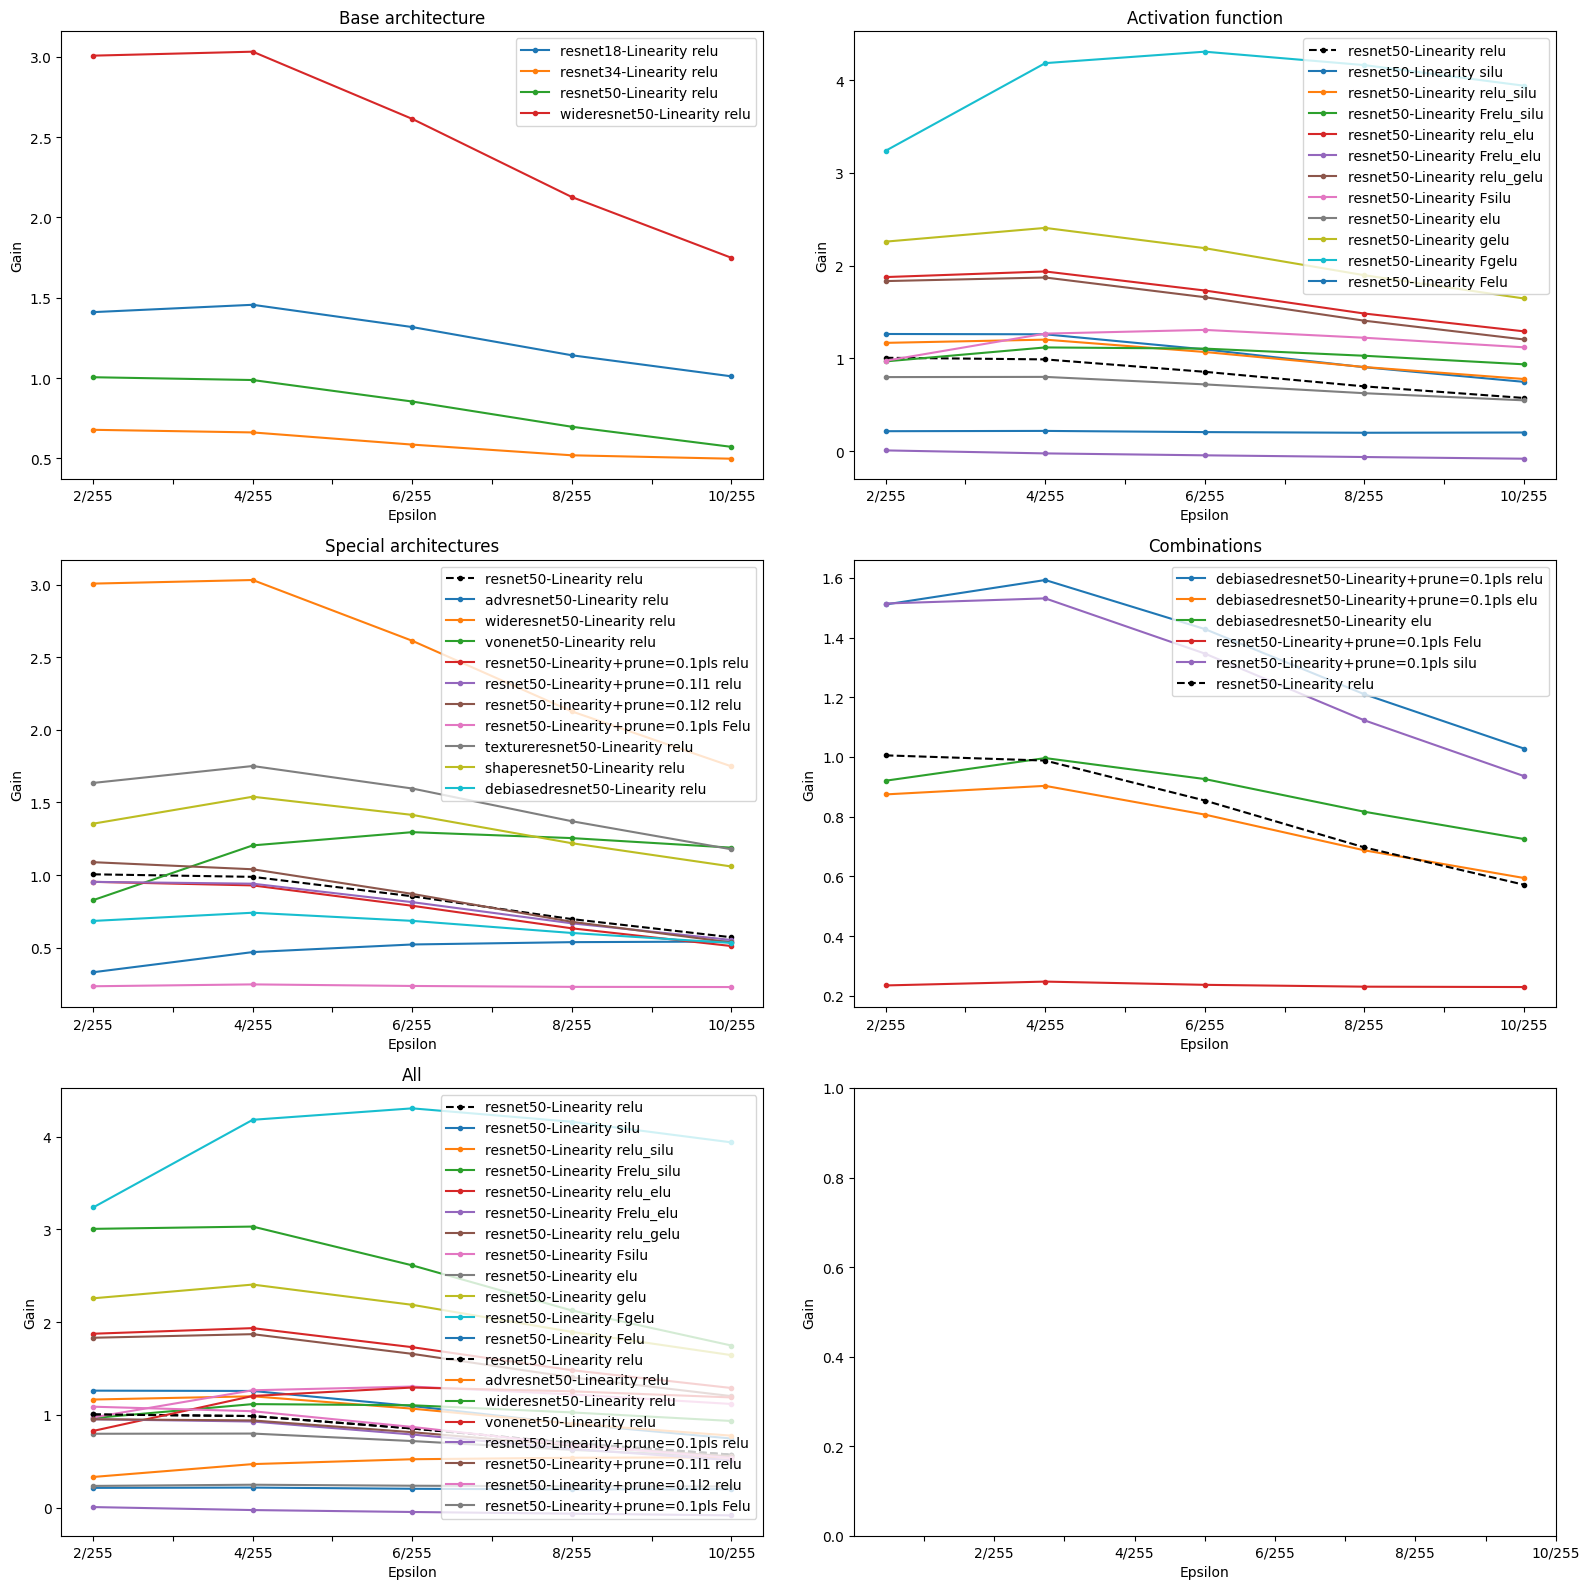

In [25]:
group = group2 + group3
groups = [group1, group2, group3+group4, group5, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']
iters = 5.0

fig, axs = plt.subplots(3,2, figsize=(16,16), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("Combinations")
axs[2,0].set_title("All")
fig.tight_layout()
axs  = axs.flatten()
# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(5):
    axis = axs[i]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
# fig.savefig('graph4.png')


In [26]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4+group5)
iters = 5.0
df_ifgsm5_all_eps = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_ifgsm5_all_eps.loc[len(df_ifgsm5_all_eps)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(srocc),
                       'result': float(abs(np.trapezoid(y_axis, x)))}
df_ifgsm5_all_eps.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.852854,0.350891
resnet50-Linearity,Felu,0.836820,1.648105
resnet50-Linearity+prune=0.1pls,Felu,0.842097,1.893518
advresnet50-Linearity,relu,0.854453,3.935136
resnet34-Linearity,relu,0.901809,4.711213
debiasedresnet50-Linearity,relu,0.900750,5.272054
resnet50-Linearity,elu,0.908697,5.625846
resnet50-Linearity+prune=0.1pls,relu,0.905343,6.167884
debiasedresnet50-Linearity+prune=0.1pls,elu,0.905012,6.264514
resnet50-Linearity+prune=0.1l1,relu,0.906935,6.351996


In [27]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4+group5)
iters=1.0
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(format(srocc,'.2f')),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.850000,-0.080000
advresnet50-Linearity,relu,0.850000,0.370000
debiasedresnet50-Linearity,relu,0.900000,0.410000
resnet50-Linearity,Felu,0.840000,0.440000
resnet50-Linearity+prune=0.1pls,Felu,0.840000,0.460000
debiasedresnet50-Linearity+prune=0.1pls,elu,0.910000,0.640000
resnet50-Linearity+prune=0.1pls,relu,0.910000,0.660000
shaperesnet50-Linearity,relu,0.900000,0.670000
resnet50-Linearity+prune=0.1l1,relu,0.910000,0.700000
debiasedresnet50-Linearity,elu,0.900000,0.710000


In [29]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4+group5)
iters = 1.0
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(format(srocc,'.2f')),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.850000,-0.230000
resnet50-Linearity+prune=0.1l2,relu,0.910000,0.280000
resnet50-Linearity+prune=0.1pls,relu,0.910000,0.300000
debiasedresnet50-Linearity,relu,0.900000,0.310000
debiasedresnet50-Linearity+prune=0.1pls,relu,0.900000,0.360000
debiasedresnet50-Linearity+prune=0.1pls,elu,0.910000,0.370000
resnet50-Linearity+prune=0.1l1,relu,0.910000,0.370000
resnet50-Linearity+prune=0.1pls,Felu,0.840000,0.370000
resnet50-Linearity,Felu,0.840000,0.440000
advresnet50-Linearity,relu,0.850000,0.510000


In [30]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4+group5)
iters = 3.0
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(format(srocc,'.2f')),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.850000,-0.060000
resnet50-Linearity,Felu,0.840000,0.760000
resnet50-Linearity+prune=0.1pls,Felu,0.840000,0.840000
advresnet50-Linearity,relu,0.850000,1.250000
debiasedresnet50-Linearity,relu,0.900000,1.810000
resnet34-Linearity,relu,0.900000,2.160000
debiasedresnet50-Linearity+prune=0.1pls,elu,0.910000,2.280000
resnet50-Linearity,elu,0.910000,2.290000
resnet50-Linearity+prune=0.1pls,relu,0.910000,2.490000
debiasedresnet50-Linearity,elu,0.900000,2.500000


In [31]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4+group5)
iters = 3.0
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(format(srocc,'.2f')),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.850000,-0.250000
resnet50-Linearity,Felu,0.840000,0.730000
resnet50-Linearity+prune=0.1pls,Felu,0.840000,0.800000
advresnet50-Linearity,relu,0.850000,1.650000
debiasedresnet50-Linearity,relu,0.900000,1.670000
resnet34-Linearity,relu,0.900000,1.790000
resnet50-Linearity+prune=0.1pls,relu,0.910000,1.880000
debiasedresnet50-Linearity+prune=0.1pls,elu,0.910000,1.960000
resnet50-Linearity,elu,0.910000,1.970000
resnet50-Linearity+prune=0.1l1,relu,0.910000,2.000000


In [32]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4+group5)
iters = 5.0
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(format(srocc,'.2f')),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.850000,-0.090000
resnet50-Linearity,Felu,0.840000,0.850000
resnet50-Linearity+prune=0.1pls,Felu,0.840000,0.970000
advresnet50-Linearity,relu,0.850000,1.790000
resnet34-Linearity,relu,0.900000,2.590000
debiasedresnet50-Linearity,relu,0.900000,2.850000
resnet50-Linearity,elu,0.910000,3.110000
debiasedresnet50-Linearity+prune=0.1pls,elu,0.910000,3.490000
resnet50-Linearity+prune=0.1pls,relu,0.910000,3.600000
resnet50-Linearity+prune=0.1l1,relu,0.910000,3.650000


In [33]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4+group5)
iters = 5.0
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(format(srocc,'.2f')),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.850000,-0.260000
resnet50-Linearity,Felu,0.840000,0.800000
resnet50-Linearity+prune=0.1pls,Felu,0.840000,0.930000
resnet34-Linearity,relu,0.900000,2.120000
advresnet50-Linearity,relu,0.850000,2.140000
debiasedresnet50-Linearity,relu,0.900000,2.420000
resnet50-Linearity,elu,0.910000,2.510000
resnet50-Linearity+prune=0.1pls,relu,0.910000,2.570000
resnet50-Linearity+prune=0.1l1,relu,0.910000,2.700000
resnet50-Linearity+prune=0.1l2,relu,0.910000,2.760000


In [77]:
baseline = [('resnet50', 'relu')]
group_activation = [('resnet50', 'relu'),
                    ("resnet50-Linearity", "silu"), 
                    ("resnet50-Linearity", "relu_silu"),
                    ("resnet50-Linearity", "Frelu_silu"),
                    ("resnet50-Linearity", "relu_elu"),
                    ("resnet50-Linearity", "Frelu_elu"),
                    ("resnet50-Linearity", "relu_gelu"),
                    ("resnet50-Linearity", "Fsilu"),
                    ("resnet50-Linearity", "elu"),
                    ("resnet50-Linearity", "gelu"),
                    ("resnet50-Linearity", "Fgelu"),("resnet50-Linearity", "Felu") ]
group_wd = [("resnet18-Linearity", "relu"), 
            ("resnet34-Linearity", "relu"), 
            ('resnet50', 'relu'),
            ("wideresnet50-Linearity", "relu")]
group_pruning = [("resnet50-Linearity+prune=0.1pls", "relu"),
                 ("resnet50-Linearity+prune=0.1l1", "relu"),
                 ("resnet50-Linearity+prune=0.1l2", "relu")]

group_feature_ex = [("textureresnet50-Linearity","relu"), ("shaperesnet50-Linearity","relu"), ("debiasedresnet50-Linearity","relu")]
group_special = [("advresnet50-Linearity","relu"),("vonenet50-Linearity", "relu")] + group_feature_ex
group_combinatioins = [("debiasedresnet50-Linearity+prune=0.1pls", "relu"), 
                       ("debiasedresnet50-Linearity+prune=0.1pls", "elu"), 
                       ("debiasedresnet50-Linearity", "elu"), 
                       ("resnet50-Linearity+prune=0.1pls", "Felu"), 
                       ("resnet50-Linearity+prune=0.1pls", "silu"), 
                       ]

/tmp/ipykernel_23155/2317035154.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  type_df = pd.concat([type_df, df_ifgsm[(df_ifgsm['architecture']==arch)&(df_ifgsm['activation']==activ)]], ignore_index=True)
/tmp/ipykernel_23155/2317035154.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  type_df = pd.concat([type_df, df_ifgsm[(df_ifgsm['architecture']==arch)&(df_ifgsm['activation']==activ)]], ignore_index=True)
/tmp/ipykernel_23155/2317035154.py:15: FutureWarning: The behavior of DataFram

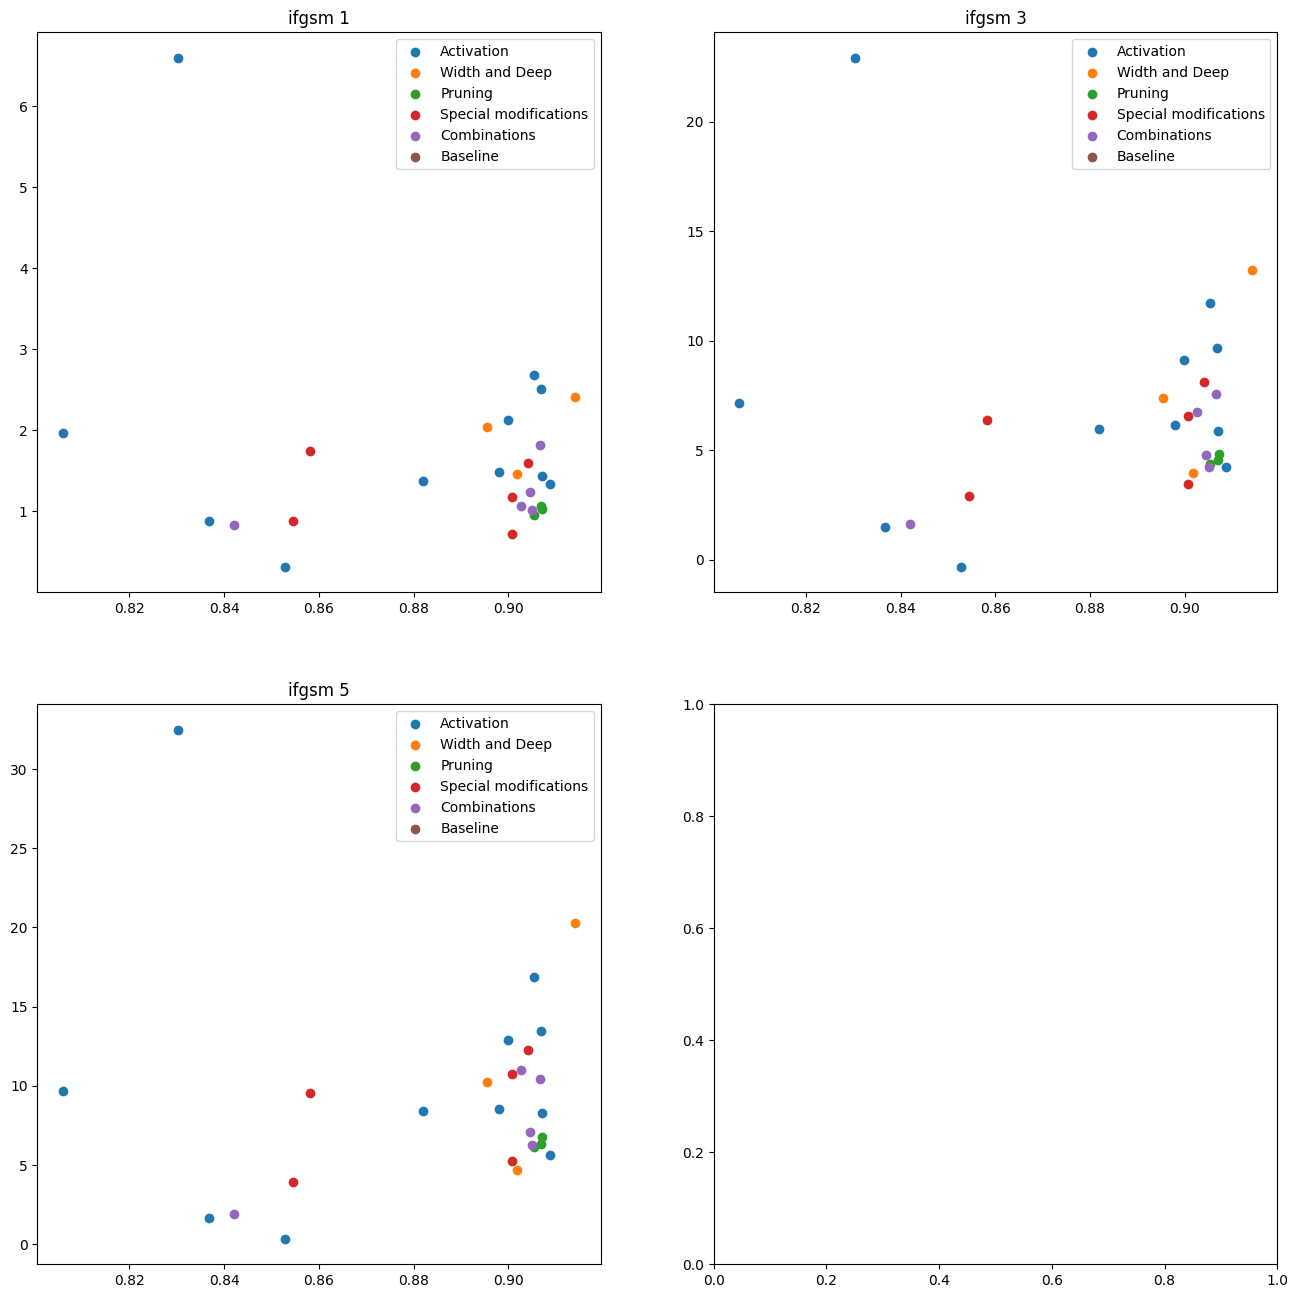

In [83]:

types = [group_activation, group_wd, group_pruning, group_special, group_combinatioins, baseline]
labels = ["Activation", "Width and Deep", "Pruning", "Special modifications", "Combinations", "Baseline"]
df_ifgsm_iter = [df_ifgsm1_all_eps, df_ifgsm3_all_eps, df_ifgsm5_all_eps]
fig, ax = plt.subplots(2,2, figsize=(16,16))
ax = ax.flatten()

for i in range(len(df_ifgsm_iter)):
    axis = ax[i]
    axis.set_title(f"ifgsm {1+2*i}")
    df_ifgsm = df_ifgsm_iter[i]
    for j, type_ in enumerate(types):
        type_df = pd.DataFrame(columns=['architecture','activation','SROCC','result'])
        label = labels[j]
        for arch, activ in type_:
            type_df = pd.concat([type_df, df_ifgsm[(df_ifgsm['architecture']==arch)&(df_ifgsm['activation']==activ)]], ignore_index=True)
        axis.scatter(type_df['SROCC'], type_df['result'], label=label)
        axis.legend()
# type1_df = pd.DataFrame(columns=['architecture','activation','SROCC','result'])
# for arch, activ in group_activation: 
#     type1_df = pd.concat([type1_df, df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture']==arch)&(df_ifgsm1_all_eps['activation']==activ)]], ignore_index=True)
# ax.scatter(type1_df['SROCC'], type1_df['result'], label="Activation")

# type2_df = pd.DataFrame(columns=['architecture','activation','SROCC','result'])
# for arch, activ in group_wd: 
#     type2_df = pd.concat([type2_df, df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture']==arch)&(df_ifgsm1_all_eps['activation']==activ)]], ignore_index=True)
# ax.scatter(type2_df['SROCC'], type2_df['result'], label="Width and Deep")

# type3_df = pd.DataFrame(columns=['architecture','activation','SROCC','result'])
# for arch, activ in group_pruning: 
#     type3_df = pd.concat([type3_df, df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture']==arch)&(df_ifgsm1_all_eps['activation']==activ)]], ignore_index=True)
# ax.scatter(type3_df['SROCC'], type3_df['result'], label="Pruning")

# type4_df = pd.DataFrame(columns=['architecture','activation','SROCC','result'])
# for arch, activ in group_special: 
#     type4_df = pd.concat([type4_df, df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture']==arch)&(df_ifgsm1_all_eps['activation']==activ)]], ignore_index=True)
# ax.scatter(type4_df['SROCC'], type4_df['result'], label="Special modifications")

# type5_df = pd.DataFrame(columns=['architecture','activation','SROCC','result'])
# for arch, activ in group_combinatioins: 
#     type5_df = pd.concat([type5_df, df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture']==arch)&(df_ifgsm1_all_eps['activation']==activ)]], ignore_index=True)
# ax.scatter(type5_df['SROCC'], type5_df['result'], label="Combinations")

# df_baseline = df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture']=='resnet50-Linearity')&(df_ifgsm1_all_eps['activation']=='relu')]
# ax.scatter(df_baseline['SROCC'], df_baseline['result'], color='black', label="Baseline")


plt.show()